# Netflix Movie and TV Show Data

## Objectives

This will be a high level exploratory data analysis on data from a list of movies and tv shows from Netflix. Our goal in this exploration is to simply gather a general idea of the type of data we have, the structure of the dataset, our features, correlations- if any-, and do some basic visualizations to help picture our data should we decide to do more in-depth data analysis for decision making or predictions. 

## Introduction
### Import and view data

Before we can begin an analysis of our data, we have to begin by importing relevant libraries and the dataset. We will only need pandas and matplotlib for this particular analysis. This will enable us to take advantage of pandas' dataframe functionality and matplotlib's visualization tools. 

We will import our data and print the first five rows. This gives us an idea of how the rest of our dataset should appear, as well as the types of features (columns). 

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

data = pd.read_csv("netflix1.csv")
df = pd.DataFrame(data)

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


We see that our dataset contains ten features- a show id, the type, title, director, country, date added, the release year, rating, duration and genre. Immediately we see much of our data is either textual or ordinal, although we have some date and duration data, but we assume even most of the numerical data is really textual. We can confirm this hunch be viewing the datatypes of each feature. 

In [54]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

This confirms our hypothesis and indeed all but one feature are classified as object- or textual- data types. Will we adjust any of these data types? That will depend on the type of analysis we choose to run later. It could be helpful, for example, in a machine learning predictor to change our type to a binary true or false (1 or 0) type. It could also be help to change the date and duration to numerical data types. However, for our exploratory data analysis we will leave each of our features as pandas has classified them. 

Another important note could be the shape of our data as this will help us know how many duplicates or missing values we have. 

In [55]:
df.shape

(8790, 10)

We see the shape of our data is 10 features (columns) and 8,790 records (rows). First, we will look to see if any of our columns contain null values, then we will observe if we have any duplicates in our records. This can be helpful to know as it will give us an idea if we might need to delete or drop a  record should it contain a duplicate. However, this is something we will not do in our exploration as we are just getting to know our data. 

In [56]:
print("Null values:\n")
for c in df.columns:
    print(f"{c}: ",df[c].isna().sum())

Null values:

show_id:  0
type:  0
title:  0
director:  0
country:  0
date_added:  0
release_year:  0
rating:  0
duration:  0
listed_in:  0


We observe no null values in any of our columns. Armed with this knowledge, we move on to duplicates. 

In [57]:
print("Duplicate values:\n")
for c in df.columns:
    print(f"{c}: ", df[c].duplicated().sum())

Duplicate values:

show_id:  0
type:  8788
title:  3
director:  4262
country:  8704
date_added:  7077
release_year:  8716
rating:  8776
duration:  8570
listed_in:  8277


Above we see we have a substantial amount of duplicates in many of the features. This is to expected as some of the columns only contain a finite number of possible values. For example, we only have two types of films: TV shows and movies. 

In [58]:
print(df["type"].unique())

['Movie' 'TV Show']


There is one column of interest in the duplicates category and that is our title column. We observe three duplicate records. Let's view those duplicate records to see if the records are full duplicates or if the duplicate is only contained in that one column. 

In [59]:
df.loc[df["title"].duplicated() == True]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [60]:
duplicates = ["9-Feb","22-Jul","15-Aug"]
for d in duplicates:
    print(df.loc[df["title"] == d])

    show_id     type  title   director   country date_added  release_year  \
393   s3997  TV Show  9-Feb  Not Given  Pakistan  3/20/2019          2018   
537   s5965  TV Show  9-Feb  Not Given  Pakistan  3/20/2019          2018   

    rating  duration                          listed_in  
393  TV-14  1 Season  International TV Shows, TV Dramas  
537  TV-14  1 Season  International TV Shows, TV Dramas  
     show_id   type   title         director country  date_added  \
3285   s4523  Movie  22-Jul  Paul Greengrass  Norway  10/10/2018   
4260   s5966  Movie  22-Jul  Paul Greengrass  Norway  10/10/2018   

      release_year rating duration          listed_in  
3285          2018      R  144 min  Dramas, Thrillers  
4260          2018      R  144 min  Dramas, Thrillers  
     show_id   type   title            director country date_added  \
2925   s3963  Movie  15-Aug  Swapnaneel Jayakar   India  3/29/2019   
4261   s5967  Movie  15-Aug  Swapnaneel Jayakar   India  3/29/2019   

      rele

These give us something on which to think should we go further in our analysis. The features for each of these duplicates are perfectly identical with the exception of the show_id. What does this mean? We will leave this question unanswered for our analysis here, but this is a question which should be answered before proceeding with deeper data analysis. 

Returning to our duplicates, to better see how many unique values each column contains, we will subtract each of the duplicate sums from the total number of records. What this shows us is how many different types of records we have per column; for example, we have 74 different release years and 14 different types of ratings. We also have only 2 types of films contained in our dataset, as was previously established. 

In [61]:
print("Unique values:\n")
for c in df.columns:
    print(f"{c}: ",(8790 - df[c].duplicated().sum()))

Unique values:

show_id:  8790
type:  2
title:  8787
director:  4528
country:  86
date_added:  1713
release_year:  74
rating:  14
duration:  220
listed_in:  513


## Exploratory Data Analysis
### Exploring our features

To dive into our exploratory analysis, we should attempt to better understand our features. We can do this through observing unique values, counts, comparisons between unique values, etc. This can be done through tables, but more helpfully through plots to visualize these differences and comparisons. Our features of interest will be primarily our type, director, country, release year, added year, rating, and duration features. We will see if anything stands out to us in our high level overview. 

### Feature 1: Type

First up is our type feature. Earlier, we established we were working with two types of films: TV shows and movies. Let's see how many movies are in the dataset as opposed to TV shows. 

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


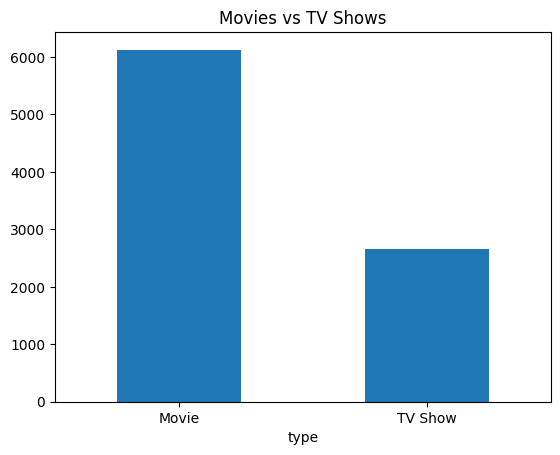

In [62]:
print(df["type"].value_counts())
df["type"].value_counts().plot(kind="bar",title="Movies vs TV Shows")
plt.xticks(rotation=0)
plt.show()

We see our 8,790 records are divided near a 2/3 split movies vs a 1/3 split TV shows. An interesting question to answer in a subsequent analysis could be, why is there such a spread between the amount of movies and TV shows created? 

### Feature 2: Director
Next up would be our directors column. We saw earlier that we had 4,528 unique directors in our dataset. Obviously that is far too many to plot. What we could do would be classify the top ten directors by appearence in our dataset. 

In [63]:
df["director"].value_counts()[0:10]

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

We observe something interesting: our most popular director is Not Given. This could present a problem in our later data analysis as this could be perceived to form a type of null value. For our visualization, we will ignore this director and focus on the top ten directors known. 

director
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Name: count, dtype: int64


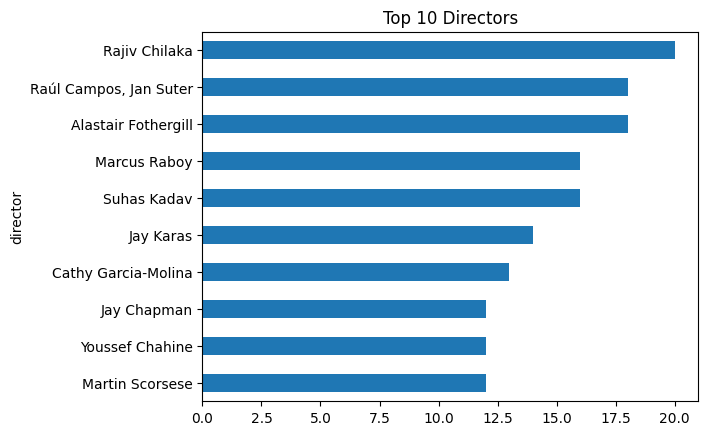

In [64]:
print(df["director"].value_counts()[1:11])
df["director"].value_counts()[1:11].sort_values(ascending=True).plot(kind="barh",title="Top 10 Directors")
plt.show()

This gives us our list of the 10 most appearing directors in our dataset. This does not tell us much else besides their output, but we can pair this data with other features in our data, such as country, rating, release date, film type, etc, to get a more comprehensive view. For our analysis, this will suffice. One other type of chart we can plot is distribution of appearences. 

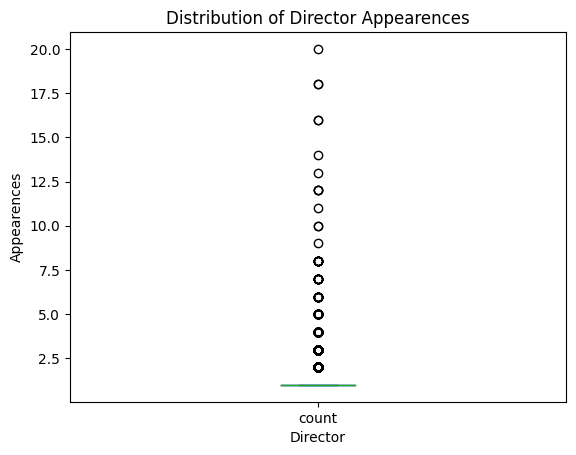

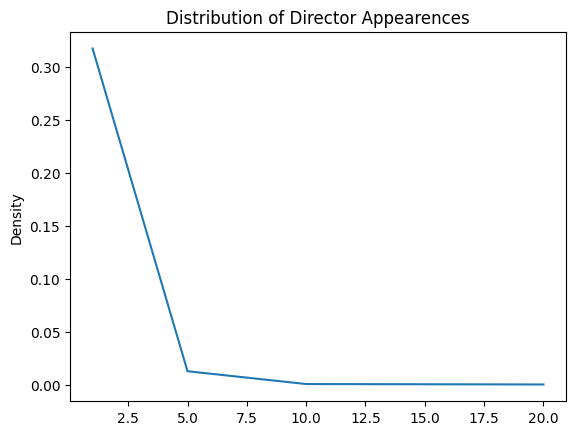

In [65]:
director = df["director"].value_counts()[1::].sort_values(ascending=True)
director.plot(kind="box",title="Distribution of Director Appearences",ylabel="Appearences",xlabel="Director")
plt.show()
director.plot.kde(bw_method=1,ind=[1,5,10,20],title="Distribution of Director Appearences")
plt.show()

Plotting the probability distribution function in these two ways enables us to see the vast majority of our directors fall below 5 appearences. This is not terribly surprising, but is interesting nonetheless, showing the 80/20 principle in action as more films are directed by fewer people. There could be some interesting analysis further into this, but we will leave that deeper analysis for a later project.

### Feature 3: Countries

We will now turn our attention to countries, showing first all 86 unique countries found in our dataset as well as the top ten and bottom ten in terms of number of records. 

In [66]:
print("Countries: \n",df["country"].unique())

Countries: 
 ['United States' 'France' 'Brazil' 'United Kingdom' 'India' 'Germany'
 'Pakistan' 'Not Given' 'China' 'South Africa' 'Japan' 'Nigeria' 'Spain'
 'Philippines' 'Australia' 'Argentina' 'Canada' 'Hong Kong' 'Italy'
 'New Zealand' 'Egypt' 'Colombia' 'Mexico' 'Belgium' 'Switzerland'
 'Taiwan' 'Bulgaria' 'Poland' 'South Korea' 'Saudi Arabia' 'Thailand'
 'Indonesia' 'Kuwait' 'Malaysia' 'Vietnam' 'Lebanon' 'Romania' 'Syria'
 'United Arab Emirates' 'Sweden' 'Mauritius' 'Austria' 'Turkey'
 'Czech Republic' 'Cameroon' 'Netherlands' 'Ireland' 'Russia' 'Kenya'
 'Chile' 'Uruguay' 'Bangladesh' 'Portugal' 'Hungary' 'Norway' 'Singapore'
 'Iceland' 'Serbia' 'Namibia' 'Peru' 'Mozambique' 'Ghana' 'Zimbabwe'
 'Israel' 'Finland' 'Denmark' 'Paraguay' 'Cambodia' 'Georgia'
 'Soviet Union' 'Greece' 'West Germany' 'Iran' 'Venezuela' 'Slovenia'
 'Guatemala' 'Jamaica' 'Somalia' 'Croatia' 'Jordan' 'Luxembourg' 'Senegal'
 'Belarus' 'Puerto Rico' 'Cyprus' 'Ukraine']


In [67]:
print("Most Appearences: \n",df["country"].value_counts()[0:10])

Most Appearences: 
 country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


In [68]:
print("Least Appearences: \n",df["country"].value_counts()[-11:-1])

Least Appearences: 
 country
Namibia         1
Cameroon        1
Jamaica         1
Guatemala       1
Slovenia        1
Mozambique      1
Iran            1
West Germany    1
Greece          1
Zimbabwe        1
Name: count, dtype: int64


In [69]:
country = df["country"].value_counts()[0:10]
country_perc = {}
print("Top Appearences by Percentage: \n")
for i in range(len(country)):
    country_perc[country.index[i]] = round((country[i]/8790)*100,2)
    print(f"{country.index[i]}: ",round((country[i]/8790)*100,2),"%")

Top Appearences by Percentage: 

United States:  36.86 %
India:  12.03 %
United Kingdom:  7.26 %
Pakistan:  4.79 %
Not Given:  3.27 %
Canada:  3.08 %
Japan:  2.95 %
South Korea:  2.43 %
France:  2.42 %
Spain:  2.07 %


As with our director feature, we see a disproportionate number of films produced by a few countries, the United States and India claiming the top two spots with the United States claiming nearly 40% (36.86%) of total films. India claimed only 12% by contrast. We also see we have a record type of Not Given, just as in the directors feature. We see a total of 287 records with the label Not Given. This claims a total of 3.27% of our data. We will leave this record type in our data, but just as with the director column, if further analysis is to be done, we would need to decide how we wanted to process this missing data. We will view our top ten country appearences in a bar plot to help us visualize. 

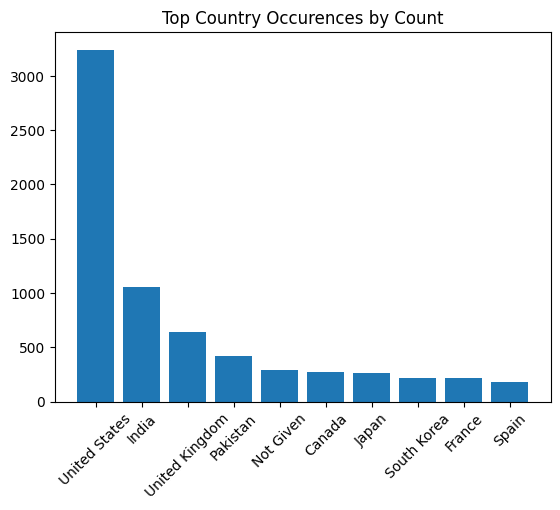

In [70]:
plt.bar(x=country.index,height=country)
plt.xticks(rotation=45)
plt.title("Top Country Occurences by Count")
plt.show()

### Feature 4 and 5: Release Year and Year Added

Next we will examine the release year and the added year features for purposes of greater exploration. 

First, our date added feature. This feature is stored as a date value with a format of MM/DD/YYYY. This is highly specific, but could be useful depending on the purpose of the analysis. One could separate the last four digits as the year and do an analysis with just the year value, or one could attempt to gain a better idea of when movies were added based on month to determine the most popular month in the dataset. We will create two new features- one for month and one for year, to do a quick EDA on this feature. 

year_added
2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64


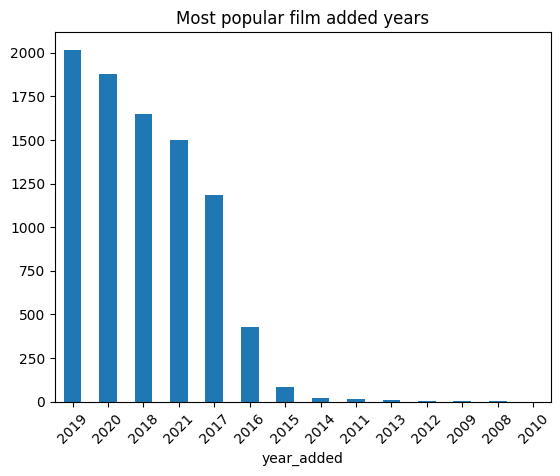

In [71]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month
year_added = df["year_added"].value_counts()
print(year_added)
year_added.plot(kind="bar",title="Most popular film added years")
plt.xticks(rotation=45)
plt.show()

From our data above, we see a strong increase in films added from the year 2016 and onward, which would be an interesting question to answer in further analysis. Netflix began online streaming in 2007, which is not represented in our dataset. However, we do see a very slow, but steady increase in films added until 2016, at which point we observe the exponetial leap. 

month_added
7     827
12    812
9     769
4     763
10    760
8     754
3     741
1     737
6     728
11    705
5     632
2     562
Name: count, dtype: int64


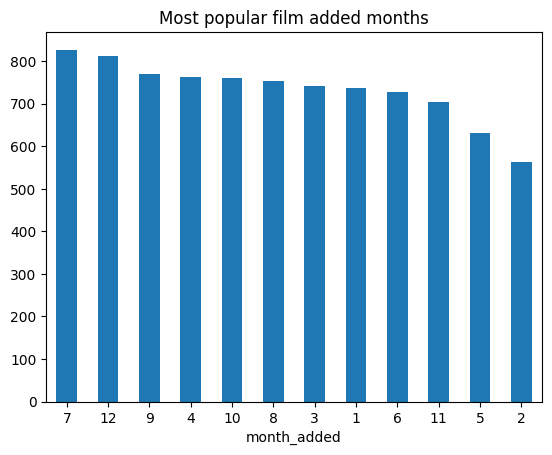

In [72]:
month_added = df["month_added"].value_counts()
print(month_added)
month_added.plot(kind="bar",title="Most popular film added months")
plt.xticks(rotation=0)
plt.show()

Unlike our years added column, we do not see a strong difference between months added. With a range of 265 between the highest month (August) and the lowest month (February), we do not see a preference for a few months over the others, although we do notice the highest two months counted are July and December, the middle and the end of the year. This could be interesting, but from what we see in our exploration, months do not have the same strong exponential difference that we see in the years added. 

Moving into feature 5, we have 74 unique years represented in our dataset. The range of these dates is from 1925 to 2021, which is a 96 year gap, meaning we have 22 or 23 years without a film occuring. We can attempt to identify the years not present and show them below. 

The range in years is:
1925 to 2021
This represents a 96 year gap
Years without a film: 23 years


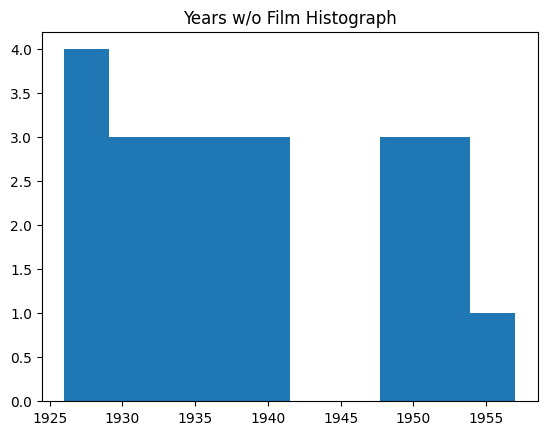

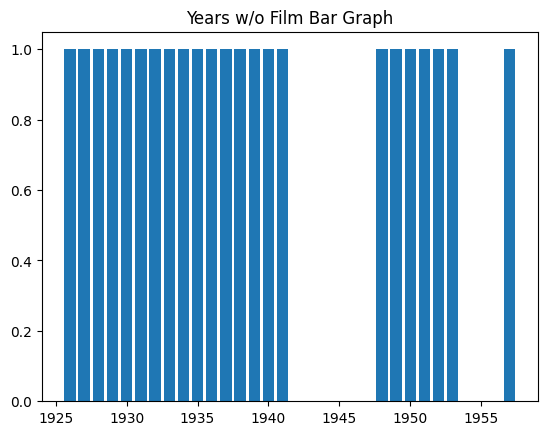

In [83]:
max_year = df["release_year"].max()
min_year = df["release_year"].min()
print(f"The range in years is:\n{min_year} to {max_year}\nThis represents a {max_year - min_year} year gap")
release_years = df["release_year"]
years = []
for y in range(min_year,(max_year + 1)):
    years.append(y)
for y in release_years:
    if y in years:
        years.pop(years.index(y))
print("Years without a film:",len(years),"years")
plt.hist(x=years)
plt.title("Years w/o Film Histograph")
plt.show()
plt.bar(x=years,height=1)
plt.title("Years w/o Film Bar Graph")
plt.show()

From the two plots above, we see many of our 23 years without a film occured between the years 1926 to 1941 and 1948 to 1953. After 1957, every subsequent year had at least one film released, perhaps demonstrating growing popularity of film, but that is a question for a deeper analysis. 
One final interesting graph we could plot for our exploratory data analysis of the release year feature would be a probability distribution graph such as a box and whisker plot to see how our release years are distributed. 

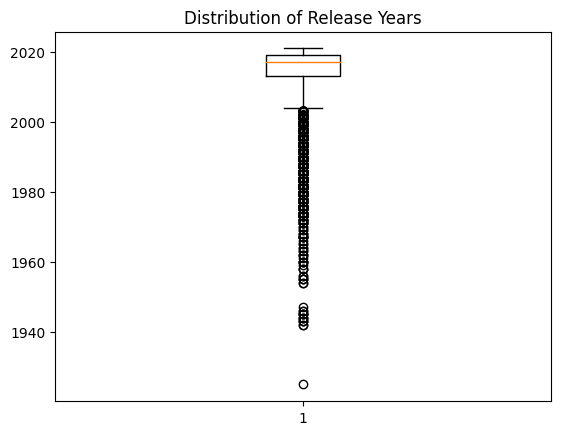

In [74]:
plt.boxplot(x=df["release_year"])
plt.title("Distribution of Release Years")
plt.show()

The above plot demonstrates a strong distribution around the most recent 10 years in our data with distribution becoming stronger the more recent the release year. While this is not necessarily surprising, further analysis must be done to gather more insights. 

### Feature 6: Rating

Our next feature to analyze is our rating feature. This data should be categorical in nature with 14 unique categories. We will plot the categories and their respective appearences. 

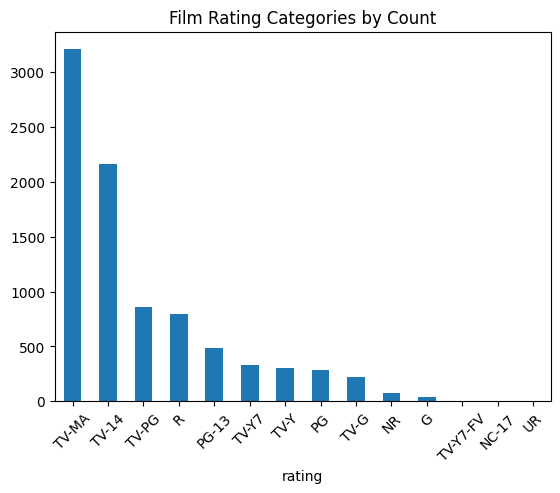

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


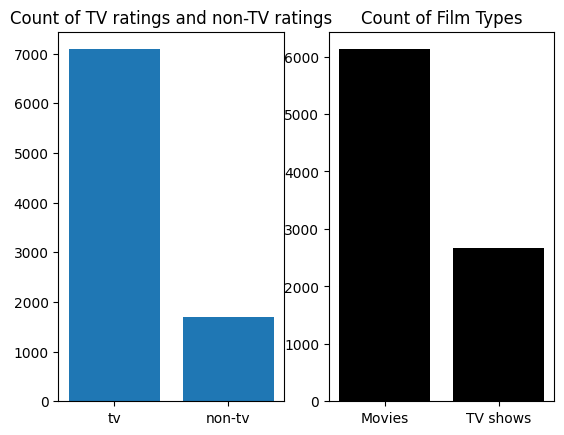

In [75]:
rating = df["rating"].value_counts().sort_values(ascending=False)
rating.plot(kind="bar",title="Film Rating Categories by Count")
plt.xticks(rotation=45)
plt.show()
print(rating)
tv_rating = df["rating"].str.contains("TV-").sum()
non_tv_rating = 8790 - tv_rating
rating_dict = {"tv": tv_rating,"non-tv":non_tv_rating}
plt.subplot(1,2,1)
plt.bar(x=rating_dict.keys(),height=rating_dict.values())
plt.title("Count of TV ratings and non-TV ratings")
plt.subplot(1,2,2)
movies = df["type"].str.contains("Movie").sum()
tv_shows = 8790 - movies
plt.bar(x=["Movies","TV shows"],height=[movies,tv_shows],color="black")
plt.title("Count of Film Types")
plt.show()

The content of our rating feature provides us with some intresting facts, especially when compared to the difference between film types. We observed both earlier and here that the quantity of movies more than doubles the quantity of TV shows in our dataset. However, based on the rating, we see ratings with a value of 'TV-' far exceed the ratings of 'non-TV-'. This most likely means some movies are being rated with a 'TV-' rating. We will try filtering by type = 'Movie' and rating = 'TV-PG' to see if any records arise. 

In [76]:
tv_movies = df[(df["type"] == "Movie") & (df["rating"] == "TV-PG")]
tv_movies.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9
51,s27,Movie,Minsara Kanavu,Rajiv Menon,India,2021-09-21,1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",2021,9
53,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,Not Given,2021-09-21,1996,TV-PG,161 min,"Comedies, International Movies",2021,9
66,s1093,Movie,Dolly Parton: A MusiCares Tribute,Not Given,Pakistan,2021-04-07,2021,TV-PG,55 min,"Documentaries, Music & Musicals",2021,4
70,s54,Movie,InuYasha the Movie 4: Fire on the Mystic Island,Toshiya Shinohara,Japan,2021-09-15,2004,TV-PG,88 min,"Action & Adventure, Anime Features, Internatio...",2021,9


We see this is in fact the case- many movies in our dataset have a 'TV-' rating. We could do further analysis to determine if there are any other interesting facts of note with this relationship. 

### Feature 7: Duration

We will look briefly at our duration feature now.  

In [77]:
print("Datatype of duration feature:",df["duration"].dtypes)
df[["type","duration"]].head()

Datatype of duration feature: object


,type,duration
0,Movie,90 min
1,TV Show,1 Season
2,TV Show,1 Season
3,Movie,91 min
4,Movie,125 min


The datatype of this feature is classified as an object due to the varrying types of durations- we see just from the first few records that TV shows have duration by season quantity while movies are recorded by minutes in length. We will only view one further question on this feature and that is the number of unique durations for movies and how many different TV show season lengths are contained in our data.

In [106]:
movie_durations = df.query("type=='Movie'")["duration"].str.strip(" min").astype(int)
tv_durations = df.query("type=='TV Show'")["duration"]
print("Number of Unique Movie Durations:",movie_durations.nunique())
print("Shortest length:",movie_durations.min(),"min\nLongest length:",movie_durations.max(),"min")
print("Average length:",round(movie_durations.mean(),2),"min")
print("Number of Uniqe TV show Durations:",tv_durations.nunique())
print(tv_durations.value_counts())

Number of Unique Movie Durations: 205
Shortest length: 3 min
Longest length: 312 min
Average length: 99.58 min
Number of Uniqe TV show Durations: 15
duration
1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
15 Seasons       2
13 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64


We see a wide variance with movie durations, which is not surprising considering they are classified in terms of minutes long. The range for duration is 3 minutes to 312 minutes, which means our data contains short films. Our average movie length is 99.58 minutes. As for TV shows, we observe a large number of TV shows only have one season with a steep decline in the number of TV shows to have more than a few seasons. 

### Feature 8: Listed In (Genres)

Lastly in our exploratory analysis, we will briefly look at our final feature, listed_in. This feature describes different genres or classifications, such as international film or drama. To truly analyze this column, we will need to parse each of the individual listings for each film. We will do this in order to count the number of unique classifiers or listings, but will not proceed into further analysis. 

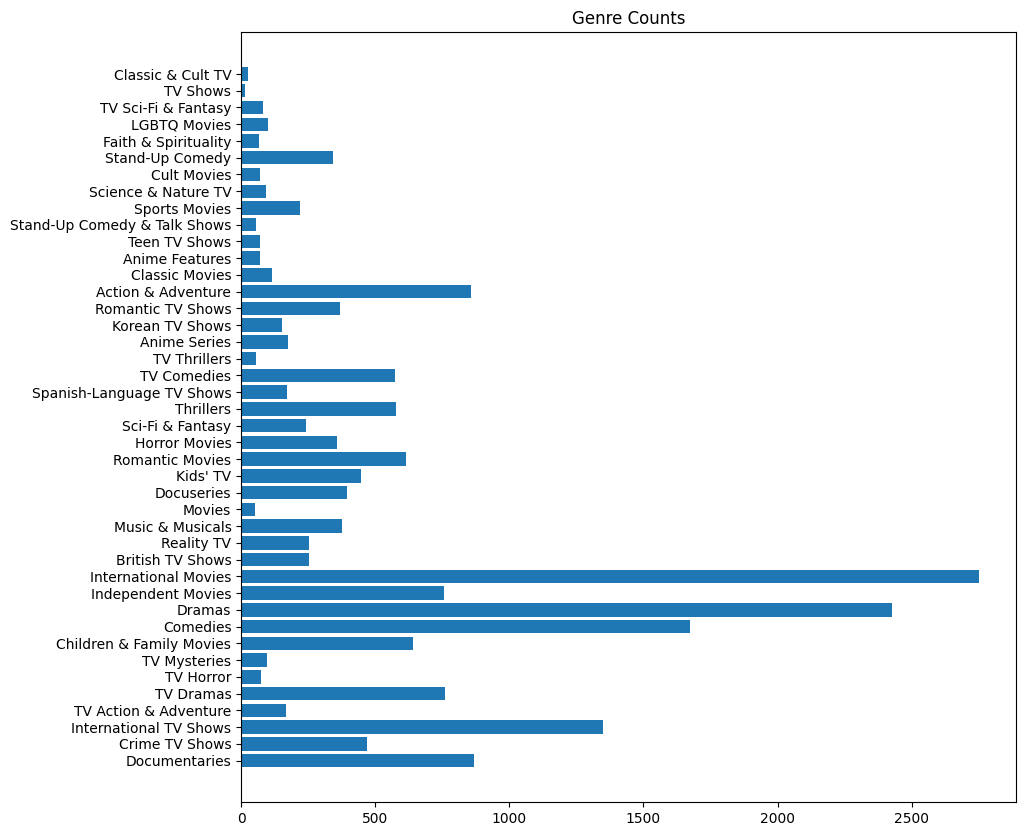

In [79]:
def extract_genres(genre_string):
    genres = [genre.strip(' "\'') for genre in genre_string.strip("[]").split(",")]
    unique_genres = genres
    return unique_genres
df["genre_list"] = df["listed_in"].apply(extract_genres)
all_genres = [genre for genres in df["genre_list"] for genre in genres]
genre_dict = {}
count = 0
for g in all_genres:
    if g not in genre_dict:
        genre_dict[g] = all_genres.count(g)
        count += 1
plt.figure(figsize=(10,10))
plt.barh(y=list(genre_dict.keys()),width=list(genre_dict.values()))
plt.title("Genre Counts")
plt.show()
    


From our bar graph we are able to observe a large difference in occurences of each unique genre, with International Movies, Dramas, and Comedies scoring as the most popular genre within our listing. Now that we have effectively categorized each genre into one dictionary, we could proceed to find more interesting insights, but we will leave our analysis here. 

## Conclusion

Our EDA is complete! We have successfully viewed and obtained a basic understanding of each of the features of our dataset which should give us a better idea of how to proceed with a deeper analysis for report building, data engineering, or predictive analytics. As stated previously, the purpose of an exploratory data analysis project is just to give us an idea of our dataset, its features, any correlations, and any missing data. We have done each of these items and viewed graphs where appropriate to help us understand distribution or counts of different values. With this done, we are ready to proceed with further analysis. 